In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
for dirname, _, filenames in os.walk('kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

kaggle/input/PokemonData/.DS_Store
kaggle/input/PokemonData/Zapdos/c3f34230c7e24d18845c4d2eaad54801.jpg
kaggle/input/PokemonData/Zapdos/f5a52cd93f924e28a46d7def3265d6b4.jpg
kaggle/input/PokemonData/Zapdos/26b19f8809ce496eae2e1b822d54492c.jpg
kaggle/input/PokemonData/Zapdos/7a63f55b762a4fe7b6cd92f17ea22ebf.jpg
kaggle/input/PokemonData/Zapdos/46f34105208f4bf791a7dc0112a42cbb.jpg
kaggle/input/PokemonData/Zapdos/7b0ddb107fb84c73b63a1fbde58d3345.jpg
kaggle/input/PokemonData/Zapdos/2b7870f2174e4a1d9e13bc0bb71fd35b.jpg
kaggle/input/PokemonData/Zapdos/8b37af987ca344dcbe792f568e3ffc65.jpg
kaggle/input/PokemonData/Zapdos/e014138c8e3c4c5892f1e0e23e2cfbcf.jpg
kaggle/input/PokemonData/Zapdos/56c1ee16eee04a9ca35fd433070f0e65.jpg
kaggle/input/PokemonData/Zapdos/785d99a028bf48089bde125938879fa4.jpg
kaggle/input/PokemonData/Zapdos/47d069b9d46b4f2880a690acfdd599f6.jpg
kaggle/input/PokemonData/Zapdos/e27ea76894f94ca4b63a6e31a50dd4ef.jpg
kaggle/input/PokemonData/Zapdos/b23068f7977f4e33a972c6b886bfa0bb.jpg

In [5]:
train_gen = ImageDataGenerator(rescale=1 / 255)


In [8]:
train_generator=train_gen.flow_from_directory('kaggle/input/PokemonData/',target_size=
(220,220),batch_size=32,class_mode='categorical')

Found 6820 images belonging to 150 classes.


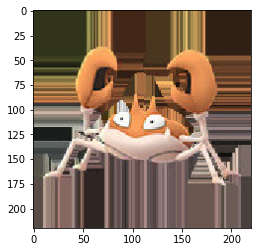

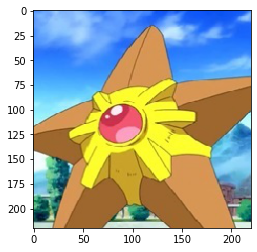

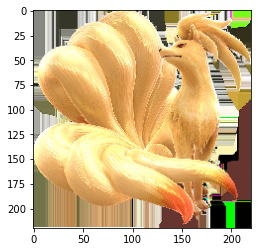

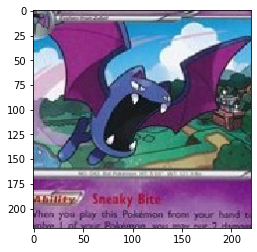

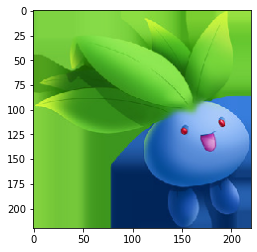

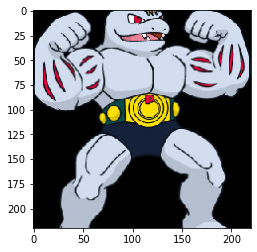

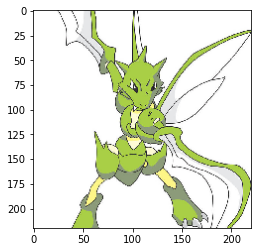

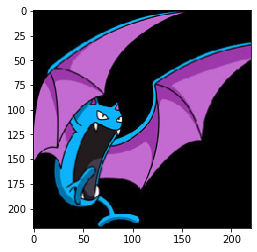

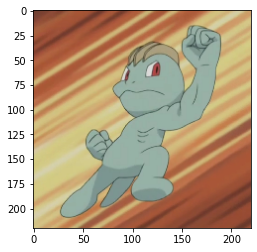

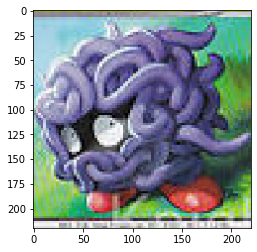

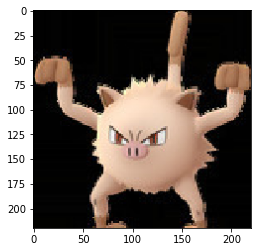

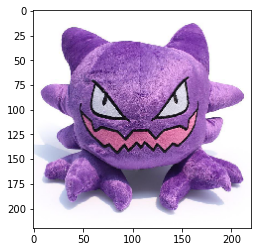

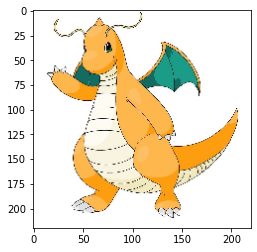

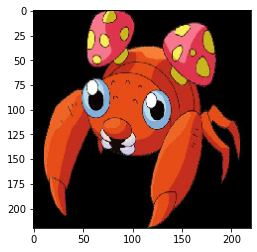

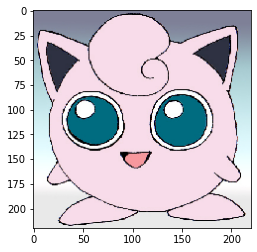

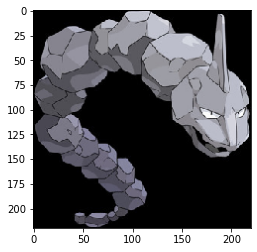

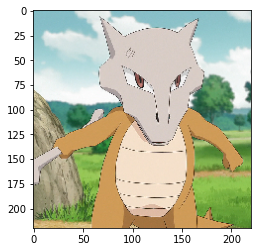

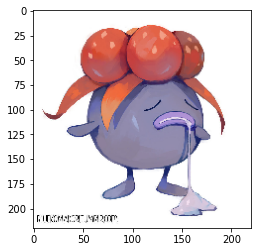

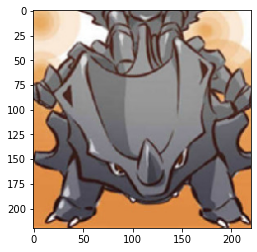

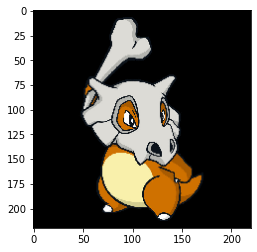

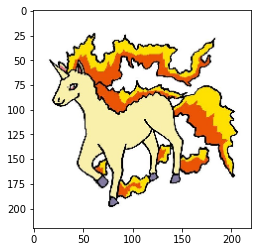

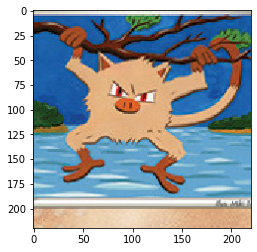

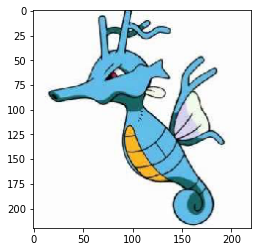

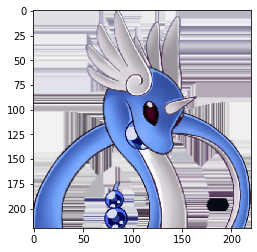

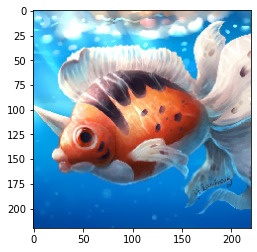

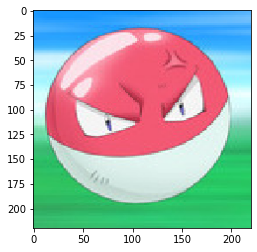

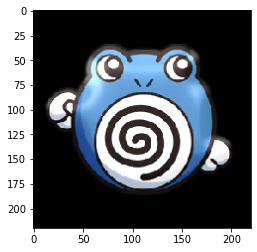

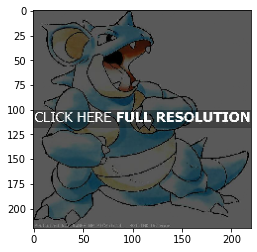

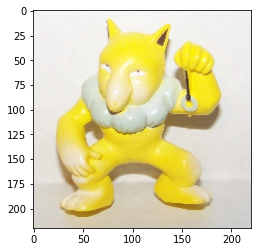

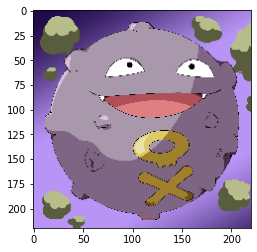

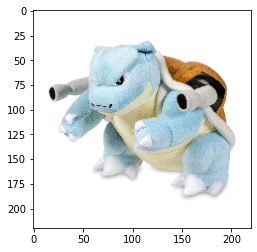

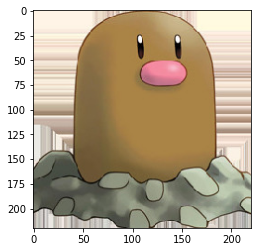

In [13]:
sample_x,sample_y = next(train_generator)
for x,y in zip( sample_x,sample_y ):
    plt.imshow(x)

    plt.show()

In [14]:
import tensorflow as tf
from tensorflow import keras

In [15]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(128,3,input_shape=(220,220,3),activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(128,3,activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(128,3,strides=(2,2),activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(64,3,strides=(2,2),activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1024,activation='relu'))
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(150,activation='softmax'))


model.summary()

2022-05-18 20:35:33.668342: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 218, 218, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 109, 109, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 107, 107, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 128)      0

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy']
              )

hist = model.fit_generator(train_generator,epochs=20)

/Users/chris.weber/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
214/214 [==============================] - 840s 4s/step - loss: 4.3353 - accuracy: 0.0635
Epoch 2/20
214/214 [==============================] - 802s 4s/step - loss: 2.9293 - accuracy: 0.2466
Epoch 3/20
214/214 [==============================] - 895s 4s/step - loss: 2.2613 - accuracy: 0.3922
Epoch 4/20
214/214 [==============================] - 658s 3s/step - loss: 1.8048 - accuracy: 0.5054
Epoch 5/20
214/214 [==============================] - 615s 3s/step - loss: 1.4692 - accuracy: 0.5830
Epoch 6/20
 93/214 [============>.................] - ETA: 5:45 - loss: 1.1667 - accuracy: 0.6604